In [1]:
from utils import FishEyeImage, rot
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from scipy.optimize import minimize, curve_fit
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, angular_separation, position_angle, offset_by, ICRS
from PIL import Image
from photutils.aperture import CircularAperture
from scipy.optimize import minimize, curve_fit, differential_evolution

from astropy.table import Table, vstack


In [16]:
file = '004_0333'

zhangbei = EarthLocation(lon=115*u.deg+14*u.arcsec,lat=41*u.deg+13*u.arcmin+53*u.arcsec,height = 1466)
dunhuang  = EarthLocation(lon=94.322799*u.deg,lat=40.359581*u.deg,height = 1100)
lenghu = EarthLocation(lon=93.9018774741078*u.deg,lat=38.59868881470391*u.deg,height = 3500)
pic = FishEyeImage(file+'.CR3',loc = lenghu,mag_limit=6.5)

solution = pic.solve(solve_size=800)

{'ra': 4.009641944901821, 'dec': 0.6912212059994189, 'eq_roll': 4.301659036432567}


In [17]:
pic.plat_para

{'lon': 0.8852647406118989,
 'lat': 1.5452605091229925,
 'roll': 8.3468635202106,
 'cu': 3000.0,
 'cv': 2000.0}

Using existing star detection data


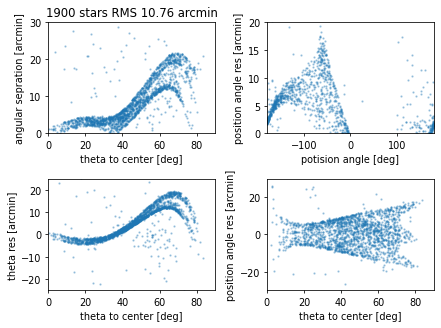

c:\Users\mlang\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\mlang\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\mlang\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\mlang\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\mlang\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [3]:
rms = pic.xmatch()
pic.draw_residual(alpha=0.3,dpi=70,s=2)
pic.outlier_cliping(clip_data='a_sep', theta_range=(0,85), bin_n=7, sigma=1.5)
pic.outlier_cliping(clip_data='a_sep', theta_range=(0,90), bin_n=15, sigma=1.5)


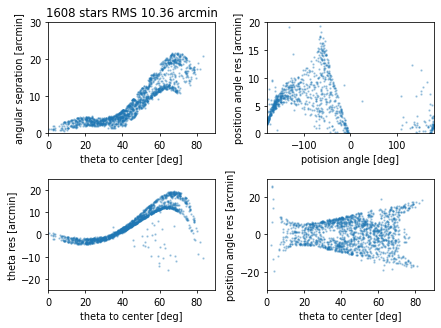

In [4]:
pic.draw_residual(alpha=0.3,dpi=70,s=2)

In [5]:
print(pic.plat_para)

{'lon': 0.8852647406118989, 'lat': 1.5452605091229925, 'roll': 8.3468635202106, 'cu': 3000.0, 'cv': 2000.0}


{'lon': 0.8878668238128303, 'lat': 1.554261668191511, 'roll': 8.34948261420418, 'cu': 2980.0496256126353, 'cv': 2010.016177436939}
{'f': 14.605172573868613, 'k': -0.1683132262993518, 'ks': array([0., 0., 0., 0.])}


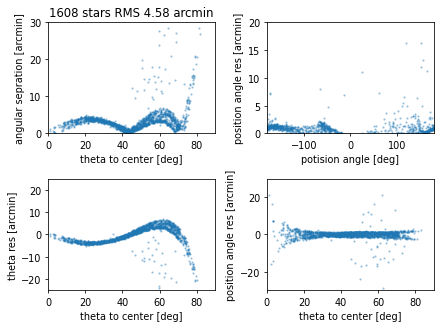

In [6]:
result  = pic.optimize(minmize_func=differential_evolution)
print(pic.plat_para)
print(pic.lens_para)
pic.draw_residual(alpha=0.3,dpi=70,s=2)

In [7]:
# im_u = pic.stars_uv[0]
# im_v = pic.stars_uv[1]
# img =  Image.open(file+'.jpg')

# cata_x,cata_y,_,_ = pic.wcs2xy(pic.catalog_lon,pic.catalog_lat)
# cata_u, cata_v = pic.xy2uv(cata_x,cata_y)
# %matplotlib qt
# plt.imshow(img)

# star = CircularAperture(np.transpose([im_u,im_v]), r=5)
# _ = star.plot(color='red', lw=1.5)

# cata = CircularAperture(np.transpose([cata_u, cata_v]), r=5)
# _ = cata.plot(color='blue', lw=1.5)
# plt.show()

(-0.008209084411859071, 0.020727738493278386, -0.013210613259736843, 0.0020219438484578517)


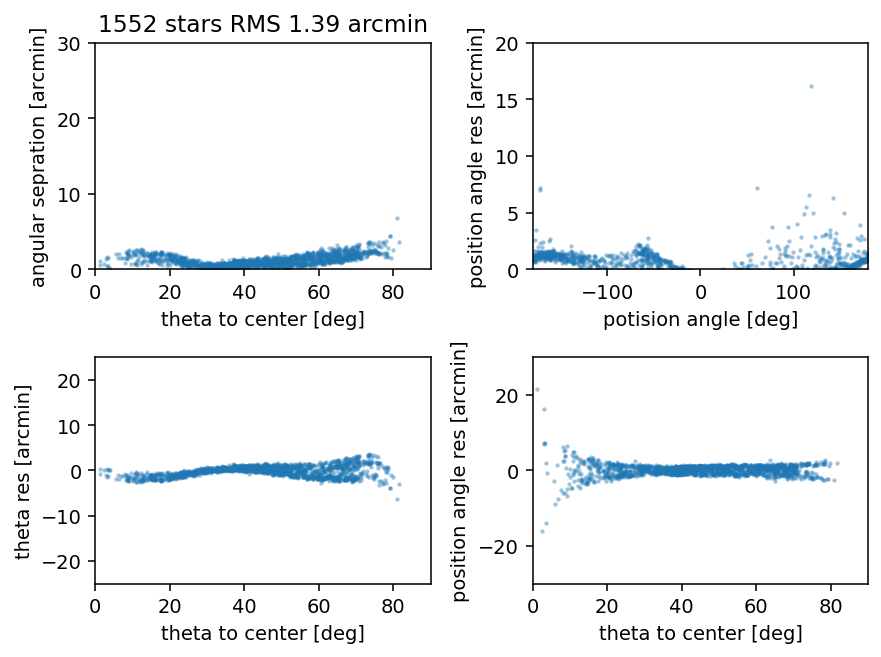

In [8]:
pic.outlier_cliping(clip_data='a_sep', theta_range=(0,70), bin_n=10, sigma=2)
pic.outlier_cliping(clip_data='pa', theta_range=(40,90), bin_n=6, sigma=2)
result  = pic.distort_optimize()
print(result)
pic.draw_residual(alpha=0.3,dpi=140,s=2)

Using existing star detection data


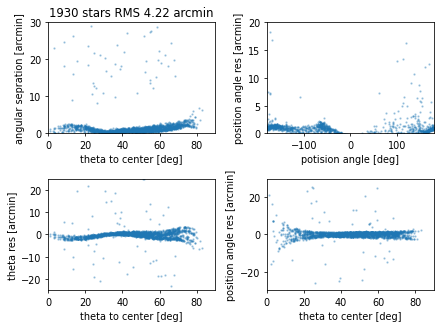

In [9]:
rms = pic.xmatch()
pic.draw_residual(alpha=0.3,dpi=70,s=2)

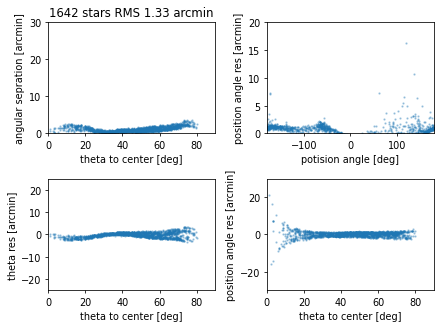

In [14]:
pic.outlier_cliping(clip_data='a_sep', theta_range=(0,85), bin_n=7, sigma=1.5)
pic.outlier_cliping(clip_data='a_sep', theta_range=(0,90), bin_n=15, sigma=1.5)
pic.draw_residual(alpha=0.3,dpi=70,s=2)

{'lon': 0.9051949312160648, 'lat': 1.5552856364138614, 'roll': 8.366816355375878, 'cu': 2977.308429290211, 'cv': 2010.619242221871}
{'f': 14.604820833763789, 'k': -0.16783081301447952, 'ks': [-0.008209084411859071, 0.020727738493278386, -0.013210613259736843, 0.0020219438484578517]}


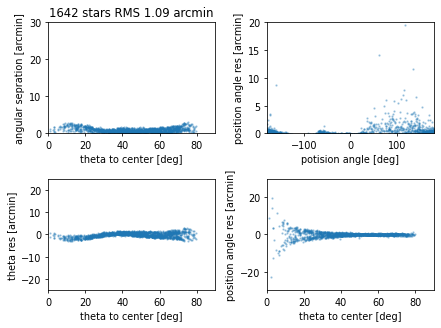

In [15]:
result  = pic.optimize(minmize_func=differential_evolution)
print(pic.plat_para)
print(pic.lens_para)
pic.draw_residual(alpha=0.3,dpi=70,s=2)

In [10]:
# stars_uv = Table.read(pic.results_path+pic.raw_path+'.stars_uv'+'_'+str(
#                 500)+'_size_'+str(15)+'_sigma.fits')
# im_u = pic.stars_uv['xcentroid']
# im_v = pic.stars_uv['ycentroid']
# x, y = pic.uv2xy(im_u, im_v)
# star_lon, star_lat, _, _ = pic.xy2wcs(x, y)

# detect_star_skycoords = SkyCoord(star_lon, star_lat, frame=pic.frame)

# idx_c2s, sep_c2s, _ = pic.catalog_skycoords.match_to_catalog_sky( # catalog to star match
#     detect_star_skycoords)
# # sep_constraint_c2s = sep_c2s < sep_limit*u.arcmin
# # idx_c2s = idx_c2s[sep_constraint_c2s]

# idx_s2c, sep_s2c, _ = detect_star_skycoords.match_to_catalog_sky( # star to catalog match
#     self.catalog_skycoords)
# # sep_constraint_s2c = sep_s2c < sep_limit*u.arcmin
# # idx_s2c = idx_s2c[sep_constraint_s2c]
# idx_s2c_sort_by_idx_c2s = idx_s2c[idx_c2s]
# xmask = idx_s2c_sort_by_idx_c2s==np.indices(idx_c2s.shape).flatten()
# sep_mask = sep_c2s<sep_limit*u.arcmin
# mask = xmask & sep_mask
# idx_c2s_xmatch = idx_c2s[mask]
# self.catalog_skycoords = self.catalog_skycoords[mask]

# if self.az_mode:
#     self.catalog_lon = self.catalog_skycoords.az
#     self.catalog_lat = self.catalog_skycoords.alt
# else:
#     self.catalog_lon = self.catalog_skycoords.ra
#     self.catalog_lat = self.catalog_skycoords.dec
# # self.star_skycoords = detect_star_skycoords[idx_c2s_xmatch]
# self.stars_uv = np.asarray(
#     [self.stars_uv['xcentroid'][idx_c2s_xmatch], self.stars_uv['ycentroid'][idx_c2s_xmatch]])

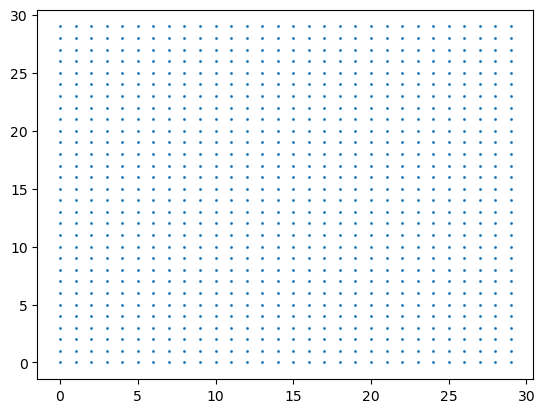

In [11]:
g = np.mgrid[0:30, 0:30]
import matplotlib.pyplot as plt
plt.scatter(g[0].flatten(),g[1].flatten(), s=1)

In [12]:
resolution=20
[sample_y,sample_x]=np.mgrid[0:4000//resolution,0:6000//resolution]*resolution+(resolution/2-0.5)
pic.uv2xy(sample_x.flatten(),sample_y.flatten())

(array([ 1662.09315252,  1644.49854016,  1626.9039278 , ...,
        -1671.12641262, -1688.72102498, -1706.31563734]),
 array([-3172.32980737, -3162.8203586 , -3153.31090983, ...,
         3153.30433716,  3162.81378594,  3172.32323471]))

In [13]:
# im_u = pic.stars_uv[0]
# im_v = pic.stars_uv[1]
# img =  Image.open(file+'.jpg')
# plt.imshow(img)

# star = CircularAperture(np.transpose([im_u,im_v]), r=5)
# _ = star.plot(color='red', lw=1.5)